# Mini-project 2 – Numerical Methods for PDEs

**Universidad EAFIT – Semester 2025-1**  
**Professor:** José Hernán Ortiz Ocampo  

---

## Problem: Solution of Laplace’s Equation

### Objective
Solve Laplace’s equation to compute the electric potential in a parallel-plate capacitor system.

### Statement
Solve Laplace’s equation:

$$
\nabla^2 V = 0 \tag{1}
$$

to calculate the electric potential in the domain described by the following physical system.

---

### System Description
We consider a parallel-plate capacitor of length $l = 4$ located at:

- **Plate 1:** $y = 2$ with potential $V_{p1}$
- **Plate 2:** $y = 4$ with potential $V_{p2}$

The domain of the problem is defined as:

$$
\Omega = [0, 8] \times [0, 6] \tag{2}
$$

---

### Boundary Conditions

1. **Dirichlet boundary conditions on the domain boundary:**

$$
V(x, y) = 0, \quad \forall (x, y) \in \partial \Omega \tag{3}
$$

2. **Internal conditions for the known plate potentials:**

$$
V(x, 2) = V_{p1}, \quad \forall x \in [2, 6] \tag{4}
$$

$$
V(x, 4) = V_{p2}, \quad \forall x \in [2, 6] \tag{5}
$$



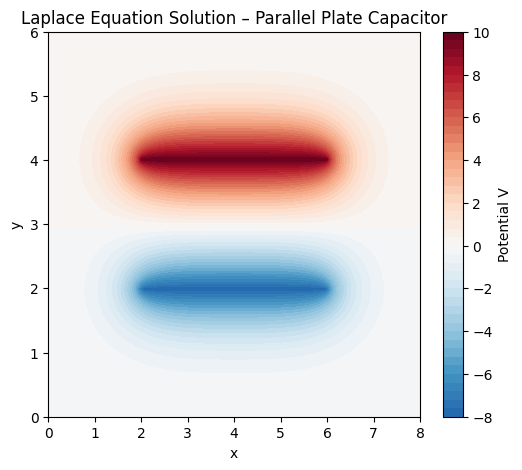

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
nx, ny = 200, 200    # number of points in x and y
x = np.linspace(0, 8, nx)
y = np.linspace(0, 6, ny)

# Potentials
V_p1 = -8
V_p2 = 10

# Initialize matrix 
u = np.zeros((ny, nx))

# Boundary conditions
for i in range(nx):
    if 2 <= x[i] <= 6:
        j1 = np.argmin(np.abs(y - 2))
        j2 = np.argmin(np.abs(y - 4))
        u[j1, i] = V_p1
        u[j2, i] = V_p2

# Iterative solver 
u_new = u.copy()
max_iter = 1000

for it in range(max_iter):
    u_new[1:-1, 1:-1] = 0.25 * (
        u[1:-1, 2:] + u[1:-1, :-2] + 
        u[2:, 1:-1] + u[:-2, 1:-1]
    )

    # Reapply internal plate conditions
    for i in range(nx):
        if 2 <= x[i] <= 6:
            j1 = np.argmin(np.abs(y - 2))
            j2 = np.argmin(np.abs(y - 4))
            u_new[j1, i] = V_p1
            u_new[j2, i] = V_p2
    u[:] = u_new

max_abs = np.max(np.abs(u))
plt.figure(figsize=(6,5))
cp = plt.contourf(x, y, u, 50, cmap='RdBu_r', vmin=-max_abs, vmax=max_abs)
plt.colorbar(cp, label="Potential V")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Laplace Equation Solution – Parallel Plate Capacitor")
plt.show()


## Comparison of Methods and Results

Both approaches solve Laplace's equation for the parallel-plate capacitor but use different strategies. The **direct matrix method** constructs and solves a linear system Ax=b exactly in one step, while the **iterative Jacobi method** uses successive approximations requiring multiple iterations. The direct method provides precise solutions but consumes more memory, whereas the iterative approach is memory-efficient and scales better for large grids. Both produce similar potential distributions with characteristic field lines between the plates.